In [23]:
import pandas as pd
import numpy as np

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [24]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
x_train[0].shape

(32, 32, 3)

In [27]:
import matplotlib.pyplot as plt

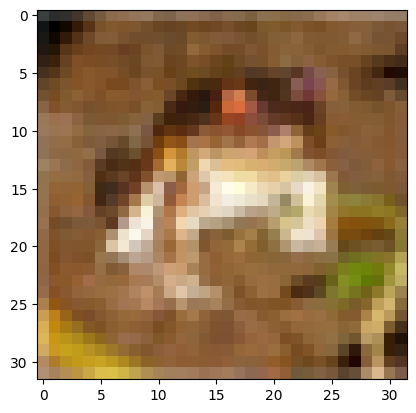

In [28]:
# FROG
plt.imshow(x_train[0])

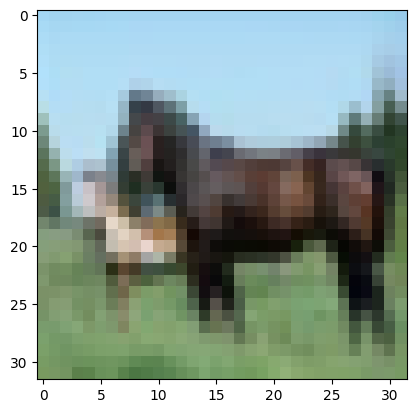

In [29]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [30]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [31]:
x_train[0].shape

(32, 32, 3)

In [32]:
x_train.max()

255

In [33]:
x_train = x_train/255

In [34]:
x_test = x_test/255

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
x_test.shape

(10000, 32, 32, 3)

In [37]:
x_train[0].min()

0.0

## Labels

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
y_train.shape

(50000, 1)

In [40]:
y_train[0]

array([6], dtype=uint8)

In [41]:
y_cat_train = to_categorical(y_train,10)

In [42]:
y_cat_train.shape

(50000, 10)

In [43]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [44]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [48]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [49]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test),
              callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50


C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 182s 112ms/step - accuracy: 0.3346 - loss: 1.8698 - precision: 0.5140 - recall: 0.1259 - val_accuracy: 0.4905 - val_loss: 1.4528 - val_precision: 0.5948 - val_recall: 0.3641
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:57 113ms/step - accuracy: 0.5938 - loss: 1.5605 - precision: 0.7857 - recall: 0.3438

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5938 - loss: 0.7807 - precision: 0.7857 - recall: 0.3438 - val_accuracy: 0.4826 - val_loss: 1.4933 - val_precision: 0.5884 - val_recall: 0.3588
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 175s 112ms/step - accuracy: 0.5369 - loss: 1.3040 - precision: 0.7081 - recall: 0.3573 - val_accuracy: 0.5465 - val_loss: 1.3365 - val_precision: 0.6616 - val_recall: 0.4519
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5312 - loss: 0.5928 - precision: 0.6087 - recall: 0.4375 - val_accuracy: 0.5625 - val_loss: 1.2869 - val_precision: 0.6818 - val_recall: 0.4652
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.6239 - loss: 1.0797 - precision: 0.7727 - recall: 0.4831 - val_accuracy: 0.6266 - val_loss: 1.0937 - val_precision: 0.7290 - val_recall: 0.5442
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5938 - loss: 0.5291 - precision: 0.7500 - recall: 0.5625 - val_accuracy: 0.6260 - val_l

In [50]:
from tensorflow.keras.models import load_model

model.save('without_batch_size_and_with_BatchNormalization.keras')

<Axes: >

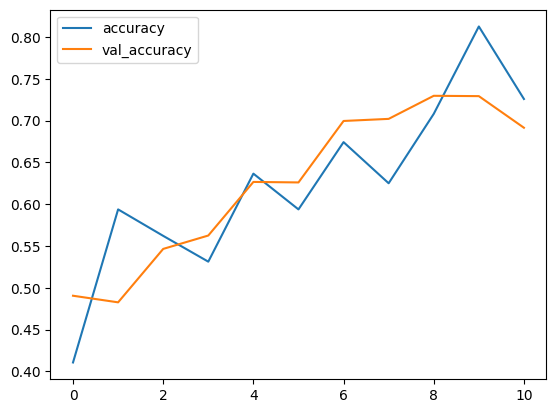

In [51]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

<Axes: >

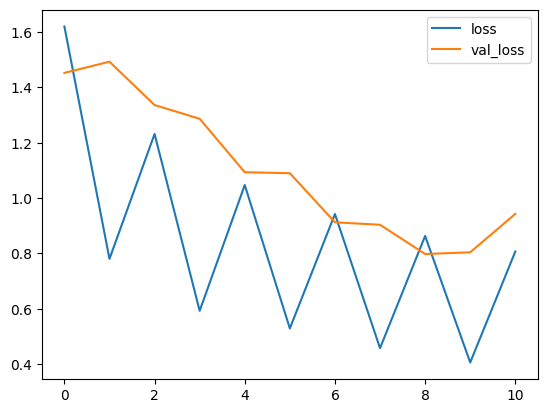

In [52]:
losses[['loss','val_loss']].plot()

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1000
           1       0.85      0.91      0.88      1000
           2       0.62      0.59      0.60      1000
           3       0.62      0.43      0.51      1000
           4       0.79      0.57      0.66      1000
           5       0.86      0.34      0.49      1000
           6       0.47      0.96      0.63      1000
           7       0.85      0.73      0.79      1000
           8       0.76      0.84      0.80      1000
           9       0.64      0.93      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.73      0.69      0.68     10000
weighted avg       0.73      0.69      0.68     10000



In [55]:
import seaborn as sns

<Axes: >

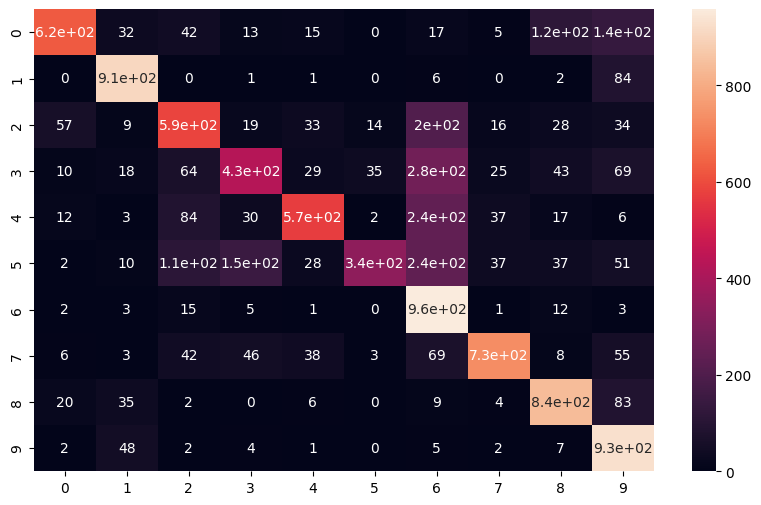

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


In [57]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test), 
              callbacks=[early_stop],
              batch_size=batch_size,
             )

Epoch 1/50


C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.7393 - loss: 0.7668 - precision: 0.8306 - recall: 0.6522 - val_accuracy: 0.7469 - val_loss: 0.7818 - val_precision: 0.8152 - val_recall: 0.6781
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 3:43 143ms/step - accuracy: 0.8438 - loss: 0.4309 - precision: 0.9630 - recall: 0.8125

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8438 - loss: 0.2156 - precision: 0.9630 - recall: 0.8125 - val_accuracy: 0.7423 - val_loss: 0.7949 - val_precision: 0.8113 - val_recall: 0.6734
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.7498 - loss: 0.7374 - precision: 0.8347 - recall: 0.6689 - val_accuracy: 0.7860 - val_loss: 0.6482 - val_precision: 0.8467 - val_recall: 0.7369
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7812 - loss: 0.4100 - precision: 0.8077 - recall: 0.6562 - val_accuracy: 0.7865 - val_loss: 0.6453 - val_precision: 0.8478 - val_recall: 0.7374
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 177s 113ms/step - accuracy: 0.7612 - loss: 0.6996 - precision: 0.8425 - recall: 0.6858 - val_accuracy: 0.7759 - val_loss: 0.6934 - val_precision: 0.8286 - val_recall: 0.7253
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8438 - loss: 0.2558 - precision: 0.8966 - recall: 0.8125 - val_accuracy: 0.7790 - val_l

In [58]:
model.save('with_batch_size_and_with_BatchNormalization.keras')

In [60]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1000
           1       0.92      0.93      0.92      1000
           2       0.72      0.77      0.75      1000
           3       0.68      0.67      0.67      1000
           4       0.79      0.81      0.80      1000
           5       0.74      0.75      0.74      1000
           6       0.84      0.89      0.86      1000
           7       0.90      0.84      0.87      1000
           8       0.87      0.93      0.90      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [61]:
model.fit(x_train,y_cat_train,epochs=50,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 110ms/step - accuracy: 0.8215 - loss: 0.5289 - precision: 0.8801 - recall: 0.7684 - val_accuracy: 0.8382 - val_loss: 0.4910 - val_precision: 0.8839 - val_recall: 0.8004
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.8354 - loss: 0.4777 - precision: 0.8846 - recall: 0.7919 - val_accuracy: 0.8435 - val_loss: 0.4631 - val_precision: 0.8902 - val_recall: 0.8059
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 110ms/step - accuracy: 0.8512 - loss: 0.4342 - precision: 0.8939 - recall: 0.8109 - val_accuracy: 0.8405 - val_loss: 0.4938 - val_precision: 0.8866 - val_recall: 0.8012
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 110ms/step - accuracy: 0.8585 - loss: 0.4080 - precision: 0.9002 - recall: 0.8209 - val_accuracy: 0.8431 - val_loss: 0.5028 - val_precision: 0.8787 - val_recall: 0.8123


In [62]:
model.save('normal_with_BatchNormalization.keras')

In [63]:
predictions = np.argmax(model.predict(x_test),axis=1)
print(classification_report(y_test,predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1000
           1       0.92      0.92      0.92      1000
           2       0.89      0.66      0.76      1000
           3       0.71      0.71      0.71      1000
           4       0.81      0.85      0.83      1000
           5       0.76      0.81      0.78      1000
           6       0.90      0.87      0.88      1000
           7       0.90      0.88      0.89      1000
           8       0.92      0.92      0.92      1000
           9       0.84      0.94      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [67]:
losses = pd.DataFrame(model.history.history)
losses.head()

""


In [68]:
model.history.history

{}

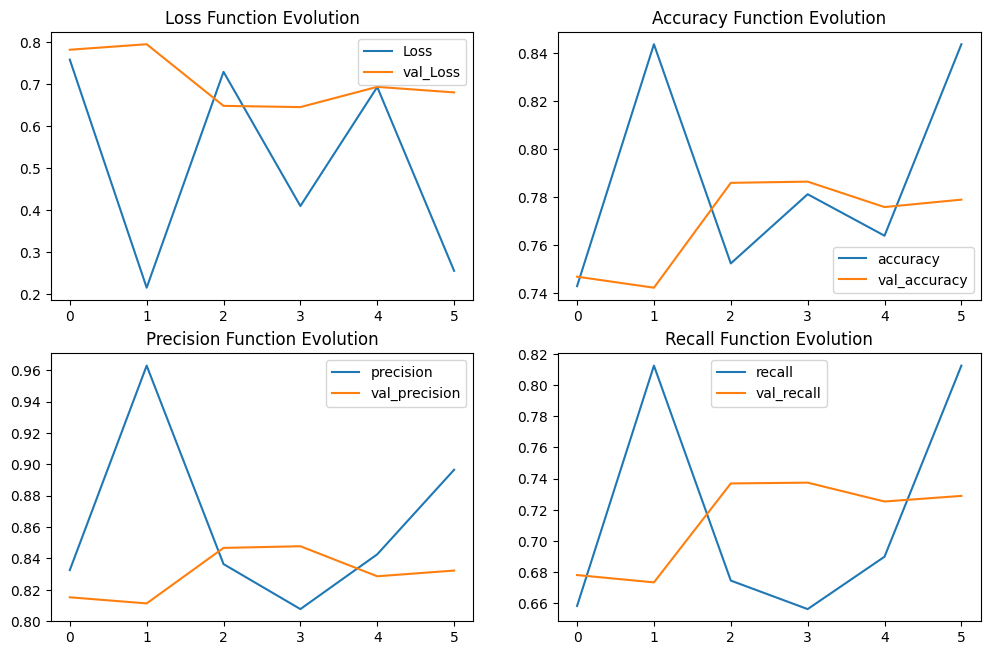

In [69]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()